In [1]:
###MARKDOWN



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Setup url and query_url for api pulls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_no_cities = len(cities)
total_no_cities

619

In [4]:
# Perform a weather check on each city using a series of successive API calls.
# for city in cities:
#     response = requests.get(query_url + city).json()

# print(json.dumps(response, indent=4, sort_keys=True))

In [5]:
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

city_number = -1
set_counter = 1
# Perform a weather check on each city using a series of successive API calls.
for city in cities:
    response = requests.get(query_url + city).json()
    city_number += 1
    try:

        print(f"Processing Record {city_number} of Set {set_counter} | {(response['name'])}")
        city_id.append(response['id'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        if city_number >= 50:
            city_number = -1
            set_counter = set_counter + 1
        
    except:
        print(f"City not found. Skipping...")
        pass
  


print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Include a print log of each city as it's being processed (with the city number and city name).


Processing Record 0 of Set 1 | Albany
Processing Record 1 of Set 1 | Yellowknife
Processing Record 2 of Set 1 | Cidreira
Processing Record 3 of Set 1 | Fortuna
Processing Record 4 of Set 1 | Bengkulu
Processing Record 5 of Set 1 | Kapaa
Processing Record 6 of Set 1 | Havelock
Processing Record 7 of Set 1 | Bambous Virieux
Processing Record 8 of Set 1 | Caravelas
Processing Record 9 of Set 1 | Batemans Bay
Processing Record 10 of Set 1 | Punta Arenas
Processing Record 11 of Set 1 | Vestmannaeyjar
Processing Record 12 of Set 1 | Bredasdorp
City not found. Skipping...
Processing Record 14 of Set 1 | Cabedelo
Processing Record 15 of Set 1 | Geraldton
Processing Record 16 of Set 1 | Hobart
Processing Record 17 of Set 1 | Ushuaia
Processing Record 18 of Set 1 | Los Llanos de Aridane
Processing Record 19 of Set 1 | George Town
City not found. Skipping...
Processing Record 21 of Set 1 | Wagar
Processing Record 22 of Set 1 | Klaksvík
Processing Record 23 of Set 1 | Havre-St-Pierre
Processing Re

Processing Record 1 of Set 5 | Kuvshinovo
Processing Record 2 of Set 5 | Torbay
Processing Record 3 of Set 5 | Takoradze
Processing Record 4 of Set 5 | Qasigiannguit
Processing Record 5 of Set 5 | Kieta
Processing Record 6 of Set 5 | Gīdolē
Processing Record 7 of Set 5 | Houma
Processing Record 8 of Set 5 | Khatanga
Processing Record 9 of Set 5 | Vila Franca do Campo
City not found. Skipping...
Processing Record 11 of Set 5 | Aquiraz
Processing Record 12 of Set 5 | Bonito
Processing Record 13 of Set 5 | Le Port
Processing Record 14 of Set 5 | Kloulklubed
Processing Record 15 of Set 5 | Missoula
Processing Record 16 of Set 5 | Veracruz
Processing Record 17 of Set 5 | Shenjiamen
Processing Record 18 of Set 5 | Port Macquarie
City not found. Skipping...
Processing Record 20 of Set 5 | Santa Cruz del Norte
Processing Record 21 of Set 5 | Tomatlán
Processing Record 22 of Set 5 | São José da Coroa Grande
Processing Record 23 of Set 5 | Tabuk
Processing Record 24 of Set 5 | Luanda
Processing 

Processing Record 2 of Set 9 | Verkhoshizhem'ye
Processing Record 3 of Set 9 | Aykhal
Processing Record 4 of Set 9 | Puerto Carreño
Processing Record 5 of Set 9 | Mitsamiouli
Processing Record 6 of Set 9 | Antalaha
Processing Record 7 of Set 9 | Pueblo Nuevo
Processing Record 8 of Set 9 | Banda Aceh
Processing Record 9 of Set 9 | Riyadh
Processing Record 10 of Set 9 | Brus Laguna
Processing Record 11 of Set 9 | Miracema do Tocantins
Processing Record 12 of Set 9 | Prince Rupert
Processing Record 13 of Set 9 | Bratsk
Processing Record 14 of Set 9 | Ichinohe
Processing Record 15 of Set 9 | Union City
Processing Record 16 of Set 9 | Tual
Processing Record 17 of Set 9 | Cherskiy
City not found. Skipping...
Processing Record 19 of Set 9 | Amapala
Processing Record 20 of Set 9 | Sergeevka
Processing Record 21 of Set 9 | Motygino
Processing Record 22 of Set 9 | Solnechnyy
Processing Record 23 of Set 9 | Muzaffarpur
Processing Record 24 of Set 9 | Maple Creek
Processing Record 25 of Set 9 | Bu

Processing Record 50 of Set 12 | Palestine
Processing Record 0 of Set 13 | Mocuba
Processing Record 1 of Set 13 | Abhā
Processing Record 2 of Set 13 | Rosarito
Processing Record 3 of Set 13 | Yelabuga
City not found. Skipping...
Processing Record 5 of Set 13 | Goderich
-----------------------------
Data Retrieval Complete
-----------------------------


In [6]:
# Display the DataFrame
weather_df = pd.DataFrame({'City_ID': city_id, 'City': city_name, 'Cloudiness': cloudiness,
                'Country': country, 'Date': date, 'Humidity': humidity, 'Lat': lat, 'Lon': lng,
                'Max Temp': max_temp, 'Wind Speed': wind_speed})

# weather_df.dropna()
weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,5106841,Albany,100,US,1596346530,59,42.60,-73.97,25.00,1.66
1,6185377,Yellowknife,20,CA,1596346610,56,62.46,-114.35,23.00,6.20
2,3466165,Cidreira,0,BR,1596346834,74,-30.18,-50.21,15.11,3.57
3,5563839,Fortuna,12,US,1596346835,1,40.60,-124.16,15.00,1.34
4,1649150,Bengkulu,98,ID,1596346897,68,-3.80,102.27,28.57,3.94


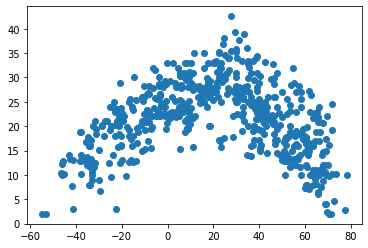

In [7]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])

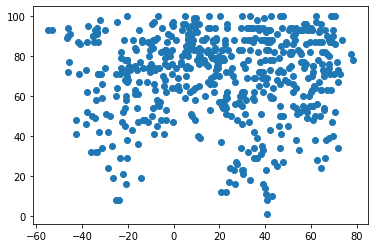

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])

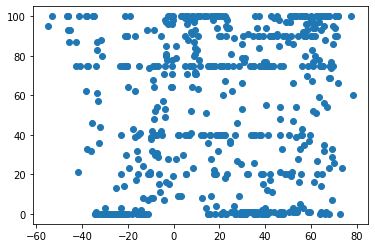

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])

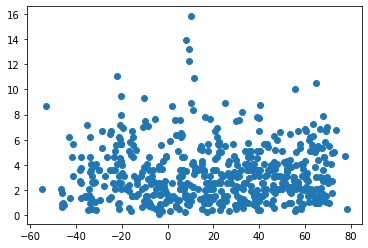

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])

In [11]:
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

The r-squared is: -0.6327770986614643


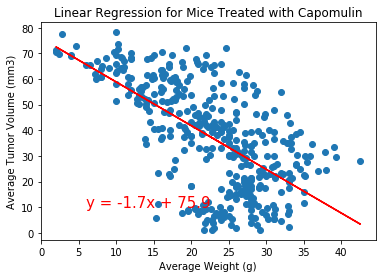

In [12]:
# Northern Hemisphere - Temperature (F) vs. Latitude

# Calculate the correlation coefficient and linear regression model for Max Temp and Latitude for the Northern Hemisphere
northern_temp_correlation = round(st.pearsonr(northern_hemisphere['Max Temp'],northern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = northern_hemisphere['Max Temp']
y_values = northern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title('Linear Regression for Mice Treated with Capomulin')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.7409334775246587


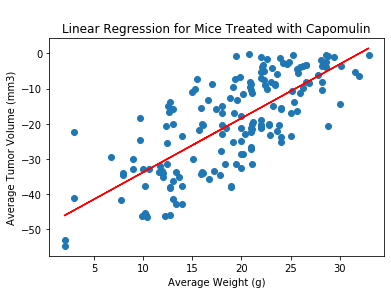

In [13]:
# Southern Hemisphere - Temperature (F) vs. Latitude

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
sourthern_temp_correlation = round(st.pearsonr(southern_hemisphere['Max Temp'],southern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = southern_hemisphere['Max Temp']
y_values = southern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title('Linear Regression for Mice Treated with Capomulin')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.04665231893473865


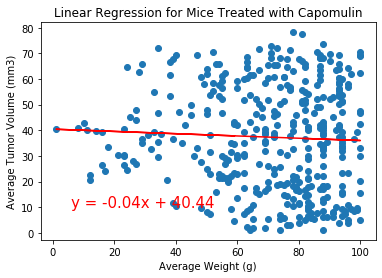

In [14]:
# Northern Hemisphere - Humidity (%) vs. Latitude

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
northern_humid_correlation = round(st.pearsonr(northern_hemisphere['Humidity'],northern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = northern_hemisphere['Humidity']
y_values = northern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title('Linear Regression for Mice Treated with Capomulin')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.04351472567123073


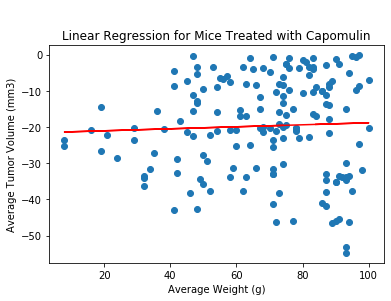

In [15]:
# Southern Hemisphere - Humidity (%) vs. Latitude

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
sourthern_temp_correlation = round(st.pearsonr(southern_hemisphere['Humidity'],southern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = southern_hemisphere['Humidity']
y_values = southern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title('Linear Regression for Mice Treated with Capomulin')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.004999190893983023


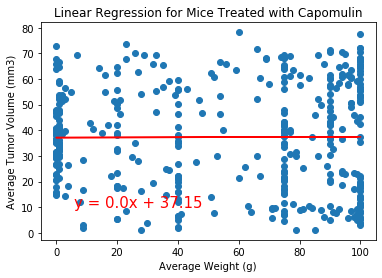

In [16]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
northern_humid_correlation = round(st.pearsonr(northern_hemisphere['Cloudiness'],northern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = northern_hemisphere['Cloudiness']
y_values = northern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title('Linear Regression for Mice Treated with Capomulin')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.041471220233322025


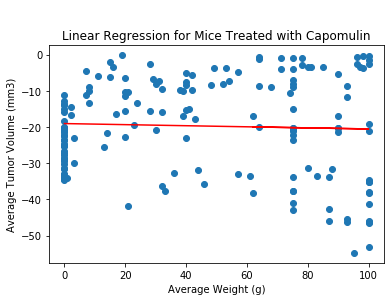

In [17]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
sourthern_temp_correlation = round(st.pearsonr(southern_hemisphere['Cloudiness'],southern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = southern_hemisphere['Cloudiness']
y_values = southern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title('Linear Regression for Mice Treated with Capomulin')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.02016977487323259


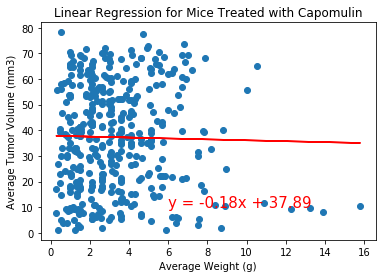

In [18]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
northern_humid_correlation = round(st.pearsonr(northern_hemisphere['Wind Speed'],northern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = northern_hemisphere['Wind Speed']
y_values = northern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title('Linear Regression for Mice Treated with Capomulin')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.07081415446685621


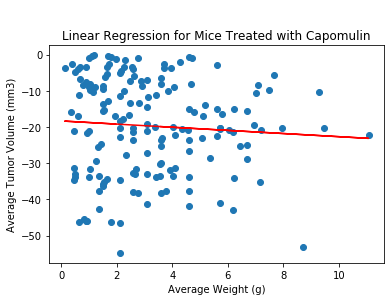

In [19]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
sourthern_temp_correlation = round(st.pearsonr(southern_hemisphere['Wind Speed'],southern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = southern_hemisphere['Wind Speed']
y_values = southern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title('Linear Regression for Mice Treated with Capomulin')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation
print(f"The r-squared is: {rvalue}")
plt.show()